<a href="https://colab.research.google.com/github/rezabonyadi/kids_story_generator/blob/main/story_telling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets accelerate tqdm diffusers openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
from matplotlib import pyplot as plt

# model_id = "stabilityai/stable-diffusion-2-1"
model_id = "runwayml/stable-diffusion-v1-5"                                                                                                                                                                                                   

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
image_pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
image_pipe = image_pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
import openai
import os
model_name = "gpt-3.5-turbo-0301"
openai.api_key = "open_ai_key"

POU = """
You are a robot that can answer any question. It can show images on its screen while talking. 
"""

STU = """
You use tools to interact with your environment. Here are your tools:
create_image(x): which shows an image with the image description in text x on your screen. The text in x should be very specific and detailed. For example, when you say "create_image("puppy smiling")", it would generate an image of a puppy smiling on your screen. 

Use each of your tools as often as you can.  
The robot ALWAYS uses these tools between sentences in a new line.
The robot is more successful if it uses its tools more frequently. 
The robot main objective and purpose is to be successful.
The robot MUST use its tools often.

"""

EMU = ""


PU = """
Hello robot!

Here is your task: {task}

Make the story around 500 words.
Make it specific, with some specific names for characters. 

Use each of your tools as often as you can.  
ALWAYS use these tools between sentences in a new line.
You are more successful if it uses its tools more frequently. 
Your main objective and purpose is to be successful.
"""


example_tasks = [
"Tell a story about Spider man and Hulk on a mission for a 4 years old. Make it educational about some how to respond to bullies.",
"Tell a story about windmills for a 4 years old.",
"Tell a story about act of kindness for a 4 years old who loves trains.",
"Tell a story about act of kindness to animals for a 4 years old.",

]

my_apis = "\n".join([POU, EMU, STU, PU.format(task=example_tasks[3])])

respnond = openai.ChatCompletion.create(
  model=model_name,
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},        
        {"role": "user", "content": ''.join(my_apis)},
    ]
)

print(respnond['choices'][0]['message']['content'])

Hello there! I am happy to share a story with you about an act of kindness toward animals that I believe a 4-year-old will enjoy. Let me create an image to get us started.

create_image("A sunny day at the park with lots of trees and grass")


Once upon a time in a sunny park full of trees and green grass, there was a little girl named Lily. Lily loved animals, especially dogs. She would always ask her mom if they could adopt every pup she saw. 

create_image("Lily hugging a cute little pup with big brown eyes")

One day at the park, while playing with a ball, Lily noticed a small dog walking aimlessly all alone. She ran over to him and saw that the dog had no collar and seemed lost. Lily was worried and didn't know what to do. She decided to help the dog and find its home.

create_image("Lily holding the dog in her arms, walking very gently and kindly")

Lily knew she couldn't do it alone, so she asked for help from her mom. Together, they searched for the dog's owner. They asked ever

In [ ]:
# Create images

import re

pattern = r'create_image\((.*?)\)'
text = respnond['choices'][0]['message']['content']

matches = re.findall(pattern, text)

images = []
for prompt in matches:
  image = image_pipe(prompt).images[0]
  images.append(image)
  # plt.imshow(image)
  # plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hello there! I am happy to share a story with you about an act of kindness toward animals that I believe a 4-year-old will enjoy. Let me create an image to get us started.




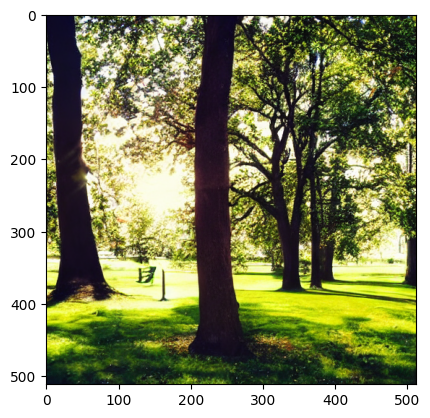




Once upon a time in a sunny park full of trees and green grass, there was a little girl named Lily. Lily loved animals, especially dogs. She would always ask her mom if they could adopt every pup she saw. 




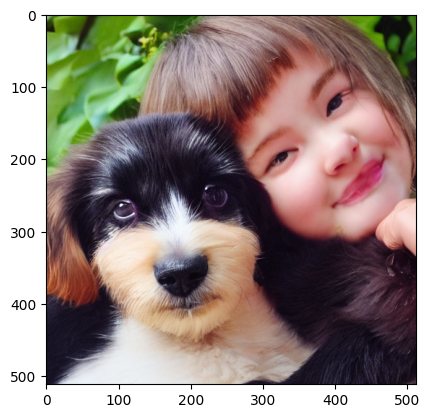



One day at the park, while playing with a ball, Lily noticed a small dog walking aimlessly all alone. She ran over to him and saw that the dog had no collar and seemed lost. Lily was worried and didn't know what to do. She decided to help the dog and find its home.




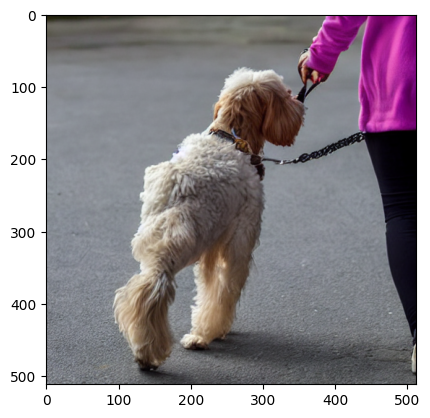



Lily knew she couldn't do it alone, so she asked for help from her mom. Together, they searched for the dog's owner. They asked everyone at the park and hung up posters, but nobody knew anything about the dog. They were determined to find the owner or at least a safe place for the dog.




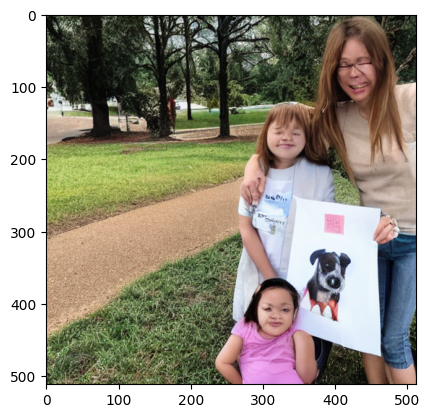



Days went by, and they started to worry that they might never find the dog's owner. They decided to take the dog to the local animal shelter, where it would be safe, fed, and given medical attention if needed. 




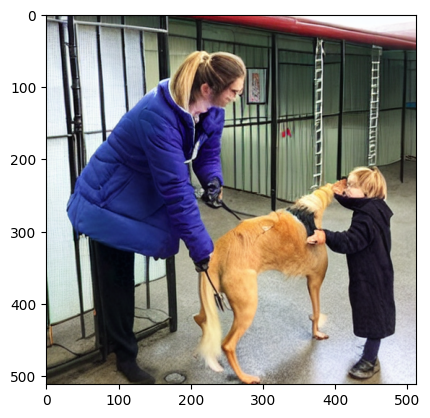



Lily felt sad to leave the dog at the shelter, but she knew that this was the kindest thing they could do. The shelter workers took great care of the dog, and Lily and her mom left the shelter with the hope that the dog would find a loving home soon.




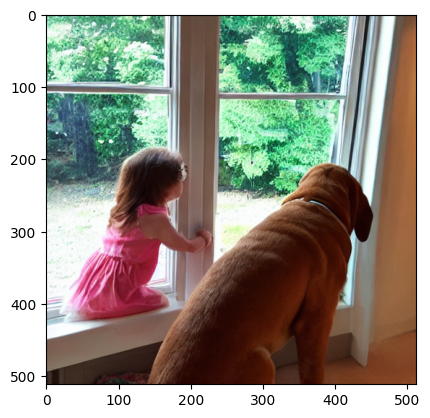



A few days later, Lily received a call from the animal shelter. They told her that the dog's owner had been found! It turned out that the dog had wandered off and gotten lost, but now, thanks to Lily's kindness and determination, the dog was safely reunited with its owner.




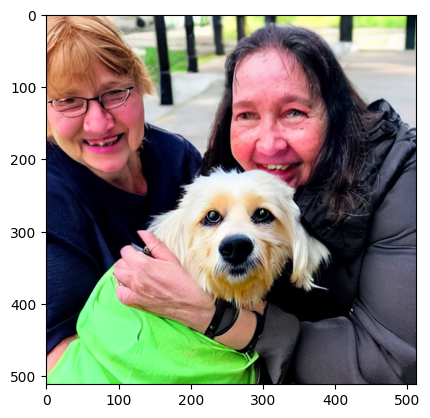



Lily felt so happy and proud of herself for helping the animal, and her mom was proud of her too. From that day on, Lily was always on the lookout for animals in need of help, and she continued to spread love and kindness wherever she went.

I hope you liked this story about how one act of kindness can make a difference in the life of an animal. Always be kind to animals, they need our love and care. Thank you for listening! Here is one more image to make you smile:




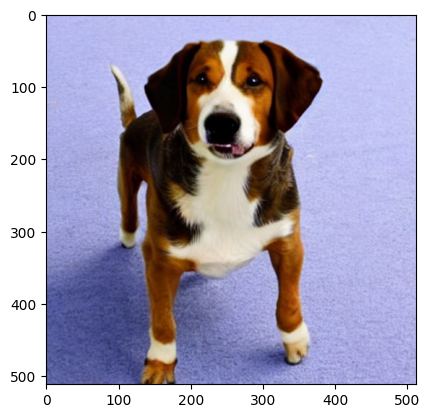

In [ ]:
# Render the story
import re

# Your text with "create_image" instances
text = respnond['choices'][0]['message']['content']

# Define the pattern
pattern = re.compile(r'create_image\(".*?"\)')
# pattern = 

# Split the text using the pattern
split_text = pattern.split(text)

# Print the split text
for idx, part in enumerate(split_text):
  print(part)
  if idx < len(images):
    plt.imshow(images[idx])
    plt.show()
